<a href="https://colab.research.google.com/github/TottadiNeelima/Facial_emotion_detection/blob/main/mini_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [ ]:
import seaborn as sns
import scipy
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from keras import models
from keras import layers
from keras import optimizers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/data/fer2013/fer2013/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in data.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])

In [ ]:
X_train = np.array(X_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
X_test = np.array(X_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')

In [ ]:
import keras
from keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

In [ ]:
testgen = ImageDataGenerator(rescale=1./255)
datagen.fit(X_train)

In [ ]:
batch_size = 64
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [ ]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import keras
import tensorflow

In [ ]:
'''from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation'''

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from keras.layers import Activation
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
vgg_conv = VGG19(weights=None, include_top=False, input_shape=(48, 48,1))

vgg_model = models.Sequential()
vgg_model.add(vgg_conv)

vgg_model.add(Flatten())
vgg_model.add(Dense(7,  kernel_initializer='normal', activation='softmax'))
vgg_model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])


In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20023232  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 7)                 3591      
                                                                 
Total params: 20,026,823
Trainable params: 20,026,823
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam(lr=0.0001, decay=1e-6)
vgg_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
num_epochs = 20
history =vgg_model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / 64,
                    epochs=num_epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=test_flow,
                    validation_steps=len(X_test) / 64)

Epoch 1/20


<ipython-input-35-a05c394fd0d2>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =vgg_model.fit_generator(train_flow,


448/448 [==============================] - 38s 83ms/step - loss: 0.0854 - accuracy: 0.5225 - val_loss: 0.0826 - val_accuracy: 0.5372
Epoch 2/20
448/448 [==============================] - 36s 80ms/step - loss: 0.0821 - accuracy: 0.5495 - val_loss: 0.0805 - val_accuracy: 0.5581
Epoch 3/20
448/448 [==============================] - 37s 82ms/step - loss: 0.0801 - accuracy: 0.5616 - val_loss: 0.0803 - val_accuracy: 0.5570
Epoch 4/20
448/448 [==============================] - 36s 80ms/step - loss: 0.0785 - accuracy: 0.5742 - val_loss: 0.0785 - val_accuracy: 0.5684
Epoch 5/20
448/448 [==============================] - 37s 82ms/step - loss: 0.0768 - accuracy: 0.5838 - val_loss: 0.0776 - val_accuracy: 0.5865
Epoch 6/20
448/448 [==============================] - 36s 81ms/step - loss: 0.0754 - accuracy: 0.5956 - val_loss: 0.0772 - val_accuracy: 0.5840
Epoch 7/20
448/448 [==============================] - 37s 82ms/step - loss: 0.0744 - accuracy: 0.6029 - val_loss: 0.0737 - val_accuracy: 0.6055
Epo

In [ ]:
vgg_model.save('/content/drive/MyDrive/image/vgg_model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/drive/MyDrive/image/vgg_model.h5')

In [ ]:
from tensorflow.keras.utils import plot_model

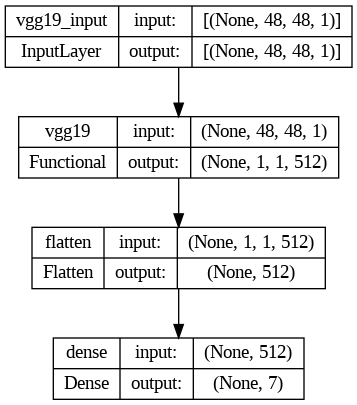

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
vgg_model.evaluate(test_flow)

57/57 [==============================] - 11s 29ms/step - loss: 1.9459 - accuracy: 0.1385


[1.9459022283554077, 0.13847868144512177]

In [ ]:
img='/content/drive/MyDrive/image/PrivateTest_647018.jpg'

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape


113/113 [==============================] - 2s 13ms/step


(3589, 7)

In [ ]:
import tensorflow
from skimage import io
from tensorflow.keras.utils import load_img
img = load_img('/content/drive/MyDrive/image/PrivateTest_647018.jpg', grayscale=True, target_size=(48, 48))
show_img=load_img('/content/drive/MyDrive/image/PrivateTest_647018.jpg', grayscale=False, target_size=(200, 200))
x = tensorflow.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

In [ ]:
x /= 255

1/1 [==============================] - 0s 441ms/step


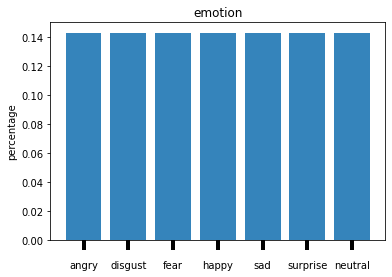

In [ ]:
custom = vgg_model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

In [ ]:
x = np.array(x, 'float32')
x = x.reshape([48, 48]);

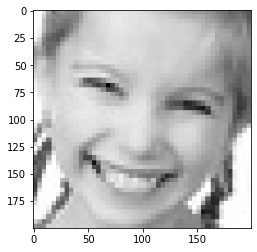

Expression Prediction: fear


In [ ]:
from matplotlib.scale import InvertedLog10Transform
plt.gray()
plt.imshow(show_img)
plt.show()
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
print('Expression Prediction:',objects[ind])